# Exercise 1
* Add Gadfly, DataFrames, and RDatasets to your packages.
* load the "iris" dataset from the "dataset" package in RDatasets (or the dataset of your choice)
* play around with Gadfly or other plotting package, and see if you can find a cool way to visualize the data (don't just use the above example)

In [ ]:
using RDatasets
oxboys = dataset("mlmRev", "Oxboys")

# Exercise 2

* combine the distributions package and interact package to visualize the pdf of an exponential distribution for different values of $\beta$.
* modify the code to visualize a different distribution of your choice.

see [univariate distributions](http://distributionsjl.readthedocs.org/en/latest/univariate.html)

In [2]:
using Interact, Distributions, Gadfly

Interact.Slider{Float64}([Reactive.Input{Float64}] 5.0,"β",5.0,0.1:0.1:10.0)

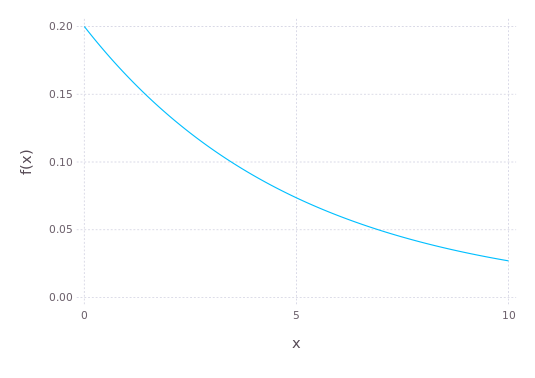

In [3]:
@manipulate for β=0.1:0.1:10
    plot(x -> pdf(Exponential(β), x), 0, 10)
end

Interact.Slider{Float64}([Reactive.Input{Float64}] 5.0,"β",5.0,0.1:0.1:10.0)

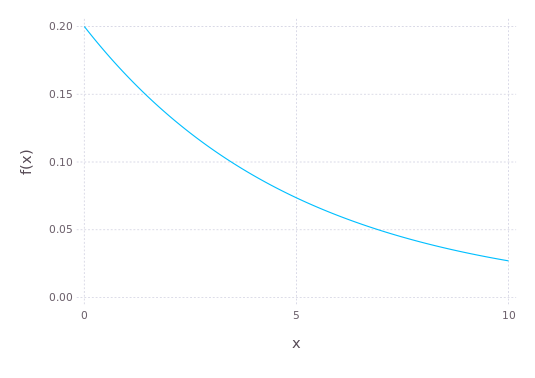

In [4]:
@manipulate for β=0.1:0.1:10
    function exp_pdf(xs)
        return pdf(Exponential(β), xs)
    end
    plot(exp_pdf, 0, 10)
end

# Exercise 3

* Use an optimization package to minimize the following function
$$F(x,y) = (x-1)^2 + (y-2)^2$$

In [ ]:
using Convex

In [7]:
# from http://convexjl.readthedocs.org/en/latest/quick_tutorial.html
m = 2;  n = 2;
A = eye(2); b = [1; 2]

# Create a (column vector) variable of size n x 1.
x = Variable(n)

# The problem is to minimize ||Ax - b||^2 subject to x >= 0
# This can be done by: minimize(objective, constraints)
problem = minimize(sum_squares(A * x - b), [x >= 0])

# Solve the problem by calling solve!
solve!(problem)

# Check the status of the problem
problem.status # :Optimal, :Infeasible, :Unbounded etc.

# Get the optimum value
problem.optval

@show x.value
;

x.value = [0.9999962564661053
 1.9999925129322107]
----------------------------------------------------------------------------
	SCS v1.1.5 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 10
eps = 1.00e-04, alpha = 1.80, max_iters = 20000, normalize = 1, scale = 5.00
Variables n = 5, constraints m = 10
Cones:	primal zero / dual free vars: 1
	linear vars: 3
	soc vars: 6, soc blks: 2
Setup time: 7.58e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf      -nan      -inf       inf       inf  2.84e-05 
    60| 1.47e-06  2.95e-06  6.57e-06  3.65e-07  6.93e-06  9.58e-17  9.57e-05 
------------------------------------------------------------------